In [ ]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
%matplotlib inline 
import torchvision.transforms as transforms 
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn as nn

In [ ]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(dataset)

60000

In [ ]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [ ]:
dataset[0], dataset[1], dataset[2], dataset[3], dataset[4], dataset[5], dataset[6], dataset[7], dataset[8], dataset[9], dataset[10]

((<PIL.Image.Image image mode=L size=28x28 at 0x7FCA8A2DC350>, 5),
 (<PIL.Image.Image image mode=L size=28x28 at 0x7FCA8A2DC410>, 0),
 (<PIL.Image.Image image mode=L size=28x28 at 0x7FCA8A2DC450>, 4),
 (<PIL.Image.Image image mode=L size=28x28 at 0x7FCA8A2DC550>, 1),
 (<PIL.Image.Image image mode=L size=28x28 at 0x7FCA8A2DC110>, 9),
 (<PIL.Image.Image image mode=L size=28x28 at 0x7FCA8A2DC5D0>, 2),
 (<PIL.Image.Image image mode=L size=28x28 at 0x7FCAFE538D90>, 1),
 (<PIL.Image.Image image mode=L size=28x28 at 0x7FCA8A2EEC50>, 3),
 (<PIL.Image.Image image mode=L size=28x28 at 0x7FCA8A2EEC90>, 1),
 (<PIL.Image.Image image mode=L size=28x28 at 0x7FCA8A2EECD0>, 4),
 (<PIL.Image.Image image mode=L size=28x28 at 0x7FCA8A2EED10>, 3))

import matplotlib.pyplot as plt

Label: 5


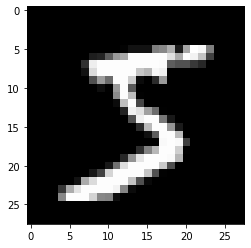

In [ ]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


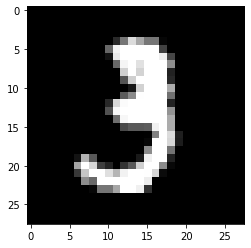

In [ ]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

import torchvision.transforms as transforms. 

PyTorch doesn't know how to work with images. We need to convert the images into tensors.

In [ ]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/', 
                train=True,
                transform=transforms.ToTensor())
                # use the ToTensor transform to convert images into PyTorch tensors.

previously we printed as the real image. 


In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


The first dimension tracks color channels. The second and third dimensions represent pixels along the height and width of the image, respectively.

In [ ]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


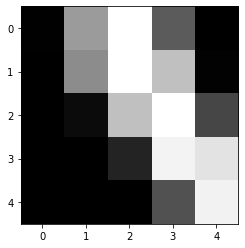

In [ ]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray');

In [ ]:
import numpy as np

def split_indices(n, val_pct):
  n = 60000 
  val_pct = 0.1

  n_val = int(val_pct*n)

  idxs = np.random.permutation(n)    # a random permutation of 0 to (n-1)
  return idxs[n_val:], idxs[:n_val]

In [ ]:
train_indices, val_indices = split_indices(len(dataset), val_pct=0.2)

In [ ]:
print(len(train_indices), len(val_indices))
print("Sample indices ", val_indices[:20])

54000 6000
Sample indices  [57084  5379 41631  6933 46346 51078  2450 51512  5867 30462 36390  6379
 16671 28512 32144 45058    82 26509 23548 30171]


In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [ ]:
batch_size = 100

# Trainig sampler and data loader 
train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler=train_sampler)

# Validation sampler and data loader 
val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                          batch_size,
                          sampler=val_sampler)

In the MNIST dataset, there are 60,000 training images and 10,000 test images. The test set is standardized so that different researchers can report their models' results against the same collection of images.

Since there's no predefined validation set, we must manually split the 60,000 images into training and validation datasets. Let's set aside 10,000 randomly chosen images for validation. We can do this using the random_spilt method from PyTorch.

In [ ]:
# # from torch.utils.data import DataLoader

# batch_size = 128

# train_loader = DataLoader(train_ds, batch_size, shuffle=True)
# val_loader = DataLoader(val_ds, batch_size)

In [ ]:
# import torch.nn as nn

input_size = 28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
print(model.weight.shape)
model.weight

torch.Size([10, 784])


Parameter containing:
tensor([[-0.0279,  0.0223, -0.0264,  ...,  0.0355, -0.0131, -0.0297],
        [ 0.0103, -0.0076,  0.0196,  ..., -0.0309,  0.0353,  0.0291],
        [-0.0303,  0.0132, -0.0083,  ...,  0.0241,  0.0109,  0.0282],
        ...,
        [ 0.0197,  0.0049,  0.0005,  ...,  0.0143, -0.0068,  0.0287],
        [-0.0321,  0.0199,  0.0353,  ...,  0.0350, -0.0331,  0.0311],
        [-0.0116,  0.0112,  0.0057,  ...,  0.0261, -0.0233,  0.0041]],
       requires_grad=True)

In [ ]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([ 0.0027, -0.0329,  0.0229, -0.0050, -0.0221, -0.0171,  0.0187,  0.0267,
        -0.0101, -0.0241], requires_grad=True)

In [ ]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([7, 2, 2, 8, 5, 0, 6, 8, 4, 8, 4, 3, 8, 5, 0, 3, 2, 4, 1, 3, 0, 5, 6, 7,
        5, 6, 3, 5, 9, 8, 8, 1, 4, 1, 1, 3, 3, 7, 4, 8, 3, 5, 8, 9, 3, 9, 5, 1,
        5, 0, 8, 2, 1, 9, 4, 5, 2, 6, 8, 0, 0, 2, 1, 3, 5, 6, 4, 4, 6, 5, 2, 6,
        3, 6, 9, 5, 2, 8, 0, 0, 9, 8, 3, 6, 5, 3, 5, 8, 8, 4, 9, 0, 9, 3, 0, 6,
        3, 7, 0, 1])
torch.Size([100, 1, 28, 28])


RuntimeError: ignored

In [ ]:
# images.shape

In [ ]:
# images.reshape(128, 784).shape

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0225,  0.0120,  0.0123,  ..., -0.0041, -0.0193, -0.0259],
         [ 0.0021, -0.0033,  0.0245,  ...,  0.0107,  0.0059, -0.0238],
         [ 0.0182, -0.0120,  0.0094,  ...,  0.0222,  0.0263, -0.0086],
         ...,
         [-0.0133, -0.0155, -0.0037,  ...,  0.0263,  0.0098,  0.0262],
         [-0.0270, -0.0333,  0.0285,  ...,  0.0113,  0.0070,  0.0039],
         [ 0.0070,  0.0167, -0.0344,  ...,  0.0246,  0.0123, -0.0148]],
        requires_grad=True), Parameter containing:
 tensor([-0.0019, -0.0297,  0.0292,  0.0010, -0.0206,  0.0278, -0.0217,  0.0152,
          0.0160, -0.0140], requires_grad=True)]

In [ ]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([100, 1, 28, 28])
outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[ 0.3104, -0.0110,  0.1769,  0.4485,  0.0436,  0.2511, -0.2575, -0.0228,
         -0.0148,  0.5795],
        [-0.0734,  0.1719, -0.0304,  0.1021,  0.0254,  0.0672, -0.1136, -0.3335,
         -0.1226,  0.2640]])


In [ ]:
import torch.nn.functional as F

In [ ]:
outputs[:2]

tensor([[ 0.3104, -0.0110,  0.1769,  0.4485,  0.0436,  0.2511, -0.2575, -0.0228,
         -0.0148,  0.5795],
        [-0.0734,  0.1719, -0.0304,  0.1021,  0.0254,  0.0672, -0.1136, -0.3335,
         -0.1226,  0.2640]], grad_fn=<SliceBackward0>)

In [ ]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.1140, 0.0827, 0.0998, 0.1309, 0.0873, 0.1075, 0.0646, 0.0817, 0.0824,
         0.1492],
        [0.0921, 0.1177, 0.0962, 0.1098, 0.1017, 0.1060, 0.0885, 0.0710, 0.0877,
         0.1291]])
Sum:  1.0


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([9, 9, 3, 9, 2, 3, 6, 8, 0, 1, 1, 2, 2, 2, 9, 9, 0, 0, 0, 9, 8, 9, 9, 8,
        9, 9, 9, 9, 9, 3, 9, 9, 9, 9, 9, 9, 9, 1, 1, 9, 9, 9, 9, 0, 9, 7, 9, 9,
        9, 9, 3, 9, 9, 9, 9, 2, 9, 9, 3, 9, 9, 9, 2, 3, 9, 9, 9, 1, 9, 9, 8, 1,
        9, 9, 3, 3, 9, 2, 2, 9, 9, 9, 9, 9, 3, 9, 9, 9, 9, 9, 9, 9, 2, 8, 0, 3,
        9, 9, 9, 9])
tensor([0.1492, 0.1291, 0.1450, 0.1378, 0.1380, 0.1603, 0.1291, 0.1267, 0.1351,
        0.1216, 0.1262, 0.1225, 0.1457, 0.1714, 0.1475, 0.1350, 0.1346, 0.1138,
        0.1350, 0.1237, 0.1800, 0.1371, 0.1338, 0.1306, 0.1280, 0.1309, 0.1315,
        0.1273, 0.1352, 0.1403, 0.1585, 0.1341, 0.1479, 0.1516, 0.1417, 0.1156,
        0.1441, 0.1194, 0.1230, 0.1584, 0.1559, 0.1317, 0.1582, 0.1415, 0.1584,
        0.1146, 0.1618, 0.1436, 0.1224, 0.1500, 0.1371, 0.1401, 0.1380, 0.1268,
        0.1302, 0.1499, 0.1631, 0.1578, 0.1255, 0.1389, 0.1481, 0.1279, 0.1202,
        0.1182, 0.1284, 0.1195, 0.1348, 0.1587, 0.1592, 0.1449, 0.1359, 0.1162,
        0.1364, 0.1

In [ ]:
labels

tensor([8, 8, 3, 2, 0, 3, 7, 6, 0, 6, 6, 6, 4, 9, 0, 9, 0, 3, 8, 0, 6, 0, 7, 6,
        2, 8, 0, 8, 5, 2, 0, 9, 8, 2, 8, 1, 9, 6, 6, 4, 2, 0, 9, 0, 0, 7, 8, 1,
        7, 8, 8, 6, 0, 5, 5, 0, 9, 0, 0, 1, 1, 4, 7, 3, 1, 5, 4, 2, 9, 0, 2, 2,
        1, 8, 3, 3, 1, 7, 6, 8, 8, 8, 1, 1, 2, 0, 9, 2, 0, 7, 1, 3, 9, 0, 0, 3,
        3, 3, 8, 1])

In [ ]:
(labels == preds)
# TRURE WHEN PREDICTION MATCHES, FALSE OTHERWISE

tensor([False, False,  True, False, False,  True, False, False,  True, False,
        False, False, False, False, False,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False,  True, False, False, False,
        False, False,  True,  True, False,  True, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False,  True, False, False, False, False,  True, False,
        False, False, False, False,  True,  True, False, False, False, False,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False,  True,  True, False, False, False, False])

In [ ]:
outputs[:2]

tensor([[ 0.3104, -0.0110,  0.1769,  0.4485,  0.0436,  0.2511, -0.2575, -0.0228,
         -0.0148,  0.5795],
        [-0.0734,  0.1719, -0.0304,  0.1021,  0.0254,  0.0672, -0.1136, -0.3335,
         -0.1226,  0.2640]], grad_fn=<SliceBackward0>)

In [ ]:
torch.sum(preds == labels)

tensor(18)

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.1800)

In [ ]:
probs

tensor([[0.1140, 0.0827, 0.0998, 0.1309, 0.0873, 0.1075, 0.0646, 0.0817, 0.0824,
         0.1492],
        [0.0921, 0.1177, 0.0962, 0.1098, 0.1017, 0.1060, 0.0885, 0.0710, 0.0877,
         0.1291],
        [0.1058, 0.0943, 0.0941, 0.1450, 0.1062, 0.0930, 0.0630, 0.0918, 0.0990,
         0.1077],
        [0.1061, 0.0707, 0.1077, 0.0805, 0.0944, 0.1018, 0.1269, 0.0730, 0.1011,
         0.1378],
        [0.1119, 0.0566, 0.1380, 0.0988, 0.0670, 0.0993, 0.1044, 0.0915, 0.0957,
         0.1368],
        [0.1109, 0.1166, 0.0865, 0.1603, 0.0859, 0.0744, 0.0596, 0.0908, 0.1030,
         0.1119],
        [0.0902, 0.0867, 0.1110, 0.0793, 0.0887, 0.0940, 0.1291, 0.1115, 0.0960,
         0.1134],
        [0.1228, 0.1042, 0.1146, 0.1044, 0.0595, 0.0956, 0.0868, 0.0743, 0.1267,
         0.1111],
        [0.1351, 0.0749, 0.1068, 0.1132, 0.0803, 0.1049, 0.0851, 0.0882, 0.0782,
         0.1333],
        [0.1133, 0.1216, 0.1183, 0.1077, 0.0754, 0.0897, 0.0819, 0.0741, 0.1074,
         0.1107],
        [0

In [ ]:
x = 0.0001

[0.1140, 0.0827, x, 0.1309, 0.0873, 0.1075, 0.0646, 0.0817, 0.0824, 0.1492]    # 
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

import math 

-math.log(x) 

9.210340371976182

In [ ]:
outputs

tensor([[ 3.1044e-01, -1.1005e-02,  1.7692e-01,  4.4845e-01,  4.3568e-02,
          2.5114e-01, -2.5745e-01, -2.2847e-02, -1.4794e-02,  5.7954e-01],
        [-7.3363e-02,  1.7186e-01, -3.0444e-02,  1.0208e-01,  2.5385e-02,
          6.7166e-02, -1.1364e-01, -3.3352e-01, -1.2264e-01,  2.6396e-01],
        [ 1.0342e-02, -1.0561e-01, -1.0709e-01,  3.2494e-01,  1.4142e-02,
         -1.1863e-01, -5.0898e-01, -1.3186e-01, -5.6225e-02,  2.8216e-02],
        [ 1.1247e-01, -2.9340e-01,  1.2769e-01, -1.6271e-01, -4.5675e-03,
          7.1471e-02,  2.9183e-01, -2.6099e-01,  6.4729e-02,  3.7437e-01],
        [ 8.5052e-02, -5.9702e-01,  2.9466e-01, -3.9027e-02, -4.2826e-01,
         -3.3774e-02,  1.6198e-02, -1.1638e-01, -7.0953e-02,  2.8648e-01],
        [ 1.8161e-02,  6.8042e-02, -2.3061e-01,  3.8644e-01, -2.3810e-01,
         -3.8115e-01, -6.0302e-01, -1.8176e-01, -5.5853e-02,  2.6733e-02],
        [-9.1042e-02, -1.3096e-01,  1.1635e-01, -2.2014e-01, -1.0767e-01,
         -4.9565e-02,  2.6726e-0

In [ ]:
loss_fn = F.cross_entropy

# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.2717, grad_fn=<NllLossBackward0>)


In [ ]:
# def evaluate(model, loss_fn, valid_dl, metric=None):
#   with torch.no_grad():
#     # pass each batch throigh the model 
#     results =[loss_batch (model, loss_fn, xb, yb, metric=metric) for xb, yb in valid_dl]
    
#     # Separate losses, counts and metrics 
#     losses, nums, metrics = zip(*results)

#     # Total size of the dataset 
#     total = np. sum(nums) 

#     # Avg. loss across batches 
#     avg_loss = np. sum(np.multiply(losses, nums)) / total 
#     avg_metric = None 
#     if metric is not None:
#       # Avg. of metric across batches
#       avg_metric = np.sum(np.multiply(metrics, nums)) / total 
#   return avg_loss, total, avg_metric

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
                    # Generate predictions
                    # Calculate loss
                    # Compute gradients
                    # Update weights
                    # Reset gradients
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)

    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection    

    return history

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [ ]:
#Before we train the model, let's see how the model performs on the validation set with the initial set of randomly initialized weights & biases.
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.3120713233947754, 'val_acc': 0.10383333265781403}

In [ ]:
#Let's train for five epochs and look at the results.
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.8384, val_acc: 0.6867
Epoch [1], val_loss: 1.5205, val_acc: 0.7573
Epoch [2], val_loss: 1.3051, val_acc: 0.7867
Epoch [3], val_loss: 1.1548, val_acc: 0.8043
Epoch [4], val_loss: 1.0455, val_acc: 0.8172


In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.5795, val_acc: 0.8663
Epoch [1], val_loss: 0.5705, val_acc: 0.8683
Epoch [2], val_loss: 0.5621, val_acc: 0.8687
Epoch [3], val_loss: 0.5543, val_acc: 0.8698
Epoch [4], val_loss: 0.5471, val_acc: 0.8703


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.5403, val_acc: 0.8715
Epoch [1], val_loss: 0.5340, val_acc: 0.8720
Epoch [2], val_loss: 0.5280, val_acc: 0.8733
Epoch [3], val_loss: 0.5223, val_acc: 0.8743
Epoch [4], val_loss: 0.5171, val_acc: 0.8750


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.5120, val_acc: 0.8757
Epoch [1], val_loss: 0.5073, val_acc: 0.8763
Epoch [2], val_loss: 0.5028, val_acc: 0.8763
Epoch [3], val_loss: 0.4985, val_acc: 0.8775
Epoch [4], val_loss: 0.4944, val_acc: 0.8777


In [ ]:
history5 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.4905, val_acc: 0.8780
Epoch [1], val_loss: 0.4869, val_acc: 0.8785
Epoch [2], val_loss: 0.4833, val_acc: 0.8798
Epoch [3], val_loss: 0.4799, val_acc: 0.8803
Epoch [4], val_loss: 0.4766, val_acc: 0.8808


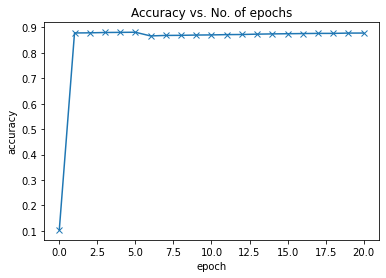

In [ ]:
#Let's visualize this using a line graph.
history = [result0] + history5 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [ ]:
# Let's test out our model with some images from the predefined test 
# dataset of 10000 images. We begin by recreating the test dataset with the ToTensor transform.
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


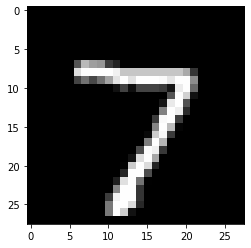

In [ ]:
#Here's a sample image from the dataset.

img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [ ]:
for x in range(10):
    img, label = test_dataset[x]
    print('Shape:', img.shape)
    print('Label:', label)

Shape: torch.Size([1, 28, 28])
Label: 7
Shape: torch.Size([1, 28, 28])
Label: 2
Shape: torch.Size([1, 28, 28])
Label: 1
Shape: torch.Size([1, 28, 28])
Label: 0
Shape: torch.Size([1, 28, 28])
Label: 4
Shape: torch.Size([1, 28, 28])
Label: 1
Shape: torch.Size([1, 28, 28])
Label: 4
Shape: torch.Size([1, 28, 28])
Label: 9
Shape: torch.Size([1, 28, 28])
Label: 5
Shape: torch.Size([1, 28, 28])
Label: 9


In [ ]:
# a helper function predict_image, which returns the predicted label for a single image tensor 

def predict_image(img, model):
    xb = img.unsqueeze(0)   # adds another dimension at the begining of the 1x28x28 tensor, making it a 1x1x28x28 tensor, 
                            # which the model views as a batch containing a single image.
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 5 , Predicted: 6


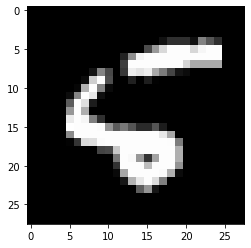

In [ ]:
# Let's try it out with a few images 

img, label = test_dataset[8]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 8


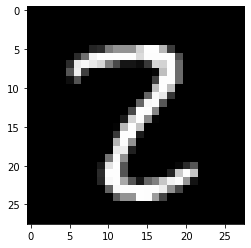

In [ ]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
# the overall loss and accuracy of the model on the test set 

test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result 

{'val_loss': 0.4709347188472748, 'val_acc': 0.8829101324081421}

In [ ]:
#Here's how you can save the model.

torch.save(model.state_dict(), 'mnist-logistic.pth')

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0200,  0.0160,  0.0068,  ..., -0.0132, -0.0289,  0.0029],
                      [-0.0141,  0.0347, -0.0212,  ...,  0.0298,  0.0108,  0.0201],
                      [-0.0235,  0.0282,  0.0217,  ..., -0.0313,  0.0276,  0.0208],
                      ...,
                      [ 0.0216,  0.0321,  0.0185,  ...,  0.0222,  0.0250, -0.0133],
                      [ 0.0183,  0.0109, -0.0045,  ..., -0.0179, -0.0168, -0.0192],
                      [-0.0187, -0.0197, -0.0187,  ...,  0.0285,  0.0342, -0.0235]])),
             ('linear.bias',
              tensor([-0.0888,  0.1242, -0.0534, -0.0650,  0.0474,  0.1429, -0.0306,  0.0597,
                      -0.1984, -0.0260]))])

In [ ]:
model2 = MnistModel()

In [ ]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 1.8638e-02,  1.7660e-03, -2.5504e-02,  ...,  7.2288e-04,
                        1.6639e-02,  1.2321e-02],
                      [-2.0491e-02,  3.2403e-02,  2.3528e-03,  ...,  2.5720e-02,
                       -2.2456e-02,  3.3463e-03],
                      [-2.5680e-02, -3.2300e-02,  3.4540e-02,  ..., -1.6465e-03,
                       -5.9274e-03, -3.2640e-02],
                      ...,
                      [-2.4138e-02, -4.1253e-03,  3.2967e-02,  ..., -2.3750e-02,
                       -1.6199e-02, -1.1840e-02],
                      [ 4.0302e-03,  2.8877e-02,  2.1510e-02,  ..., -1.0552e-04,
                       -1.3987e-02, -2.8551e-02],
                      [ 2.1199e-03,  5.4738e-05, -3.2231e-02,  ..., -2.0875e-02,
                       -3.0313e-02, -2.2608e-02]])),
             ('linear.bias',
              tensor([ 0.0232, -0.0307, -0.0032, -0.0231,  0.0174, -0.0189, -0.0347, -0.0084,
                      -0.0239,

In [ ]:
evaluate(model2, test_loader)

{'val_loss': 2.327096462249756, 'val_acc': 0.06484375149011612}

In [ ]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0200,  0.0160,  0.0068,  ..., -0.0132, -0.0289,  0.0029],
                      [-0.0141,  0.0347, -0.0212,  ...,  0.0298,  0.0108,  0.0201],
                      [-0.0235,  0.0282,  0.0217,  ..., -0.0313,  0.0276,  0.0208],
                      ...,
                      [ 0.0216,  0.0321,  0.0185,  ...,  0.0222,  0.0250, -0.0133],
                      [ 0.0183,  0.0109, -0.0045,  ..., -0.0179, -0.0168, -0.0192],
                      [-0.0187, -0.0197, -0.0187,  ...,  0.0285,  0.0342, -0.0235]])),
             ('linear.bias',
              tensor([-0.0888,  0.1242, -0.0534, -0.0650,  0.0474,  0.1429, -0.0306,  0.0597,
                      -0.1984, -0.0260]))])

In [ ]:
# Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before 

test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.45308905839920044, 'val_acc': 0.8857421875}